# Pymaceuticals Inc.
---

### Analysis

- There are a total of 248 mouse in this dataset. 
- 123 are female and 125 are male.
- Capomulin and Ramicane had the lowest average tumor volumes.
- They also had the most number of data inputs recorded.
- Their final total volumes were also lower than the other two drugs that were analyzed against.
- Of the four drug regimens, Infubinol is the only drug that may have an outlier in the dataset.
- For mouse s185 treated with Capomulin, the tumor volume decreased over the time period it was observed. 
- The correlation between weight and average tumor volume is 0.84. 
- The linear regression model shows that as weight increased, average tumor volume also increased.
- From the data, we can concluded that Capomulin and Ramicane are better choices to reduce tumor volumes.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_df = pd.merge(mouse_metadata, study_results, on = ["Mouse ID"])

# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_results_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_results_df[mouse_results_df[['Mouse ID', 'Timepoint']].duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_results_df.drop(mouse_results_df[mouse_results_df['Mouse ID'] == 'g989'].index)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_groups = cleaned_df.groupby("Drug Regimen")
    
#total sum of volumes for each drug
drug_tumor_volumes = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sum()

#frequency of each drug
drug_count = drug_groups["Drug Regimen"].count()
mean = drug_groups.mean()
median = drug_groups.median()
variance = drug_groups.var()
std = drug_groups.std()
SEM = drug_groups.sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean["Tumor Volume (mm3)"], 
                          "Median Tumor Volume":median["Tumor Volume (mm3)"], 
                          "Tumor Volume Variance":variance["Tumor Volume (mm3)"], 
                          "Tumor Volume Std. Dev.":std["Tumor Volume (mm3)"],
                          "Tumor Volume Std. Err.": SEM["Tumor Volume (mm3)"]})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg = drug_groups["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

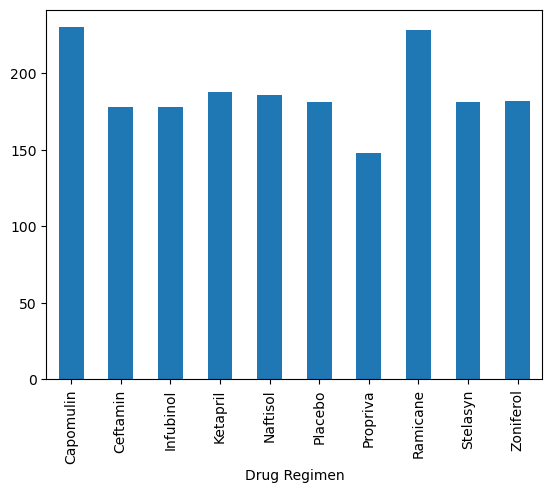

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_count.plot(kind='bar')

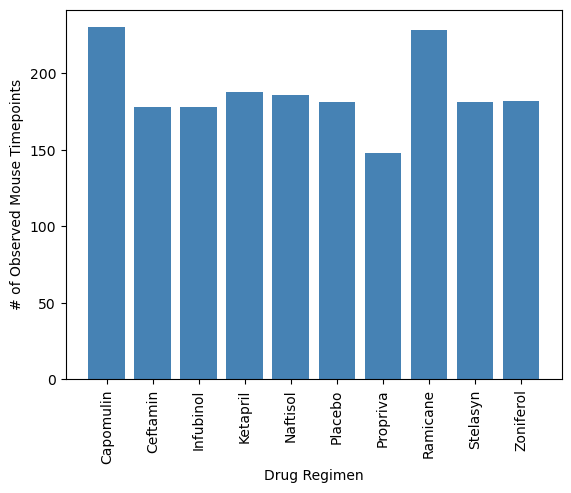

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x = np.arange(len(drug_groups))
y = drug_count.values
tick_locations = [value for value in x]

plt.xticks(tick_locations, summary_df.index, rotation="vertical")
plt.bar(x, y, color="steelblue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [13]:
mouse_grouped = cleaned_df.groupby(['Sex'])['Mouse ID'].nunique()

In [14]:
sex_totals = cleaned_df.groupby(['Sex'])['Mouse ID'].count()

<Axes: ylabel='Sex'>

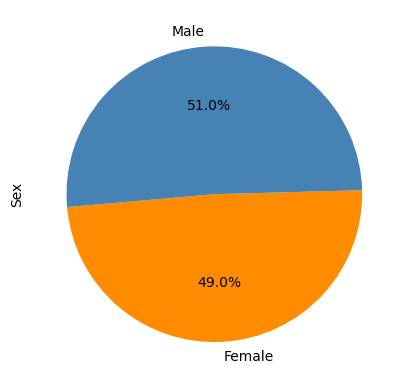

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['darkorange', 'steelblue']

sex_totals.plot(kind='pie', y='sex_totals', ylabel="Sex", autopct='%.1f%%', startangle=185, colors=colors)

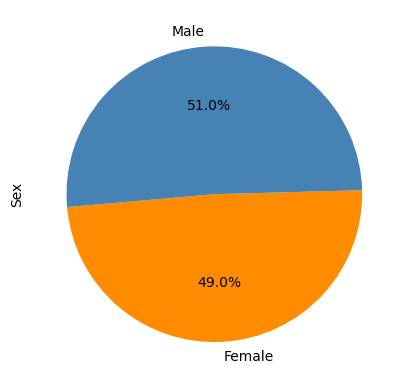

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_totals.index
colors = ['darkorange', 'steelblue']

plt.pie(sex_totals, autopct="%1.1f%%", colors=colors, labels=labels, startangle=185)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
mouse_groups = cleaned_df.groupby("Mouse ID")
greatest_timepoint_df = pd.DataFrame(mouse_groups["Tumor Volume (mm3)"].last())
greatest_timepoint_df = greatest_timepoint_df.rename(columns={'Tumor Volume (mm3)': 'End Tumor Volume'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_df, greatest_timepoint_df, on='Mouse ID')
#df of mouse id, drug and end tumor volume
drug_tumor_df = merged_df[['Mouse ID','Drug Regimen','End Tumor Volume']].copy()
#each end tumor volumes values
end_drug_tumor_df = drug_tumor_df.groupby("End Tumor Volume").size()
#drop duplicate mouse ids to show only one end tumor volume per mouse
drop_dupes = drug_tumor_df.drop_duplicates("Mouse ID")

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = drop_dupes.sort_values(by=['Drug Regimen'])

#df of each drug's info
Ramicane_df = tumor_vol_data[tumor_vol_data['Drug Regimen'] == 'Ramicane']
Capomulin_df = tumor_vol_data[tumor_vol_data['Drug Regimen'] == 'Capomulin']
Infubinol_df = tumor_vol_data[tumor_vol_data['Drug Regimen'] == 'Infubinol']
Ceftamin_df = tumor_vol_data[tumor_vol_data['Drug Regimen'] == 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowq = tumor_vol_data['End Tumor Volume'].quantile(.25)
upq = tumor_vol_data['End Tumor Volume'].quantile(.75)
iqr = upq-lowq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowq - (1.5 * iqr)
upper_bound = upq + (1.5*iqr)

In [19]:
#df of each drug's info
Ramicane_df = drop_dupes[drop_dupes['Drug Regimen'] == 'Ramicane']
Capomulin_df = drop_dupes[drop_dupes['Drug Regimen'] == 'Capomulin']
Infubinol_df = drop_dupes[drop_dupes['Drug Regimen'] == 'Infubinol']
Ceftamin_df = drop_dupes[drop_dupes['Drug Regimen'] == 'Ceftamin']

#dfs sorted by tumor volume ascending
Ramicane_sorted = Ramicane_df.sort_values(by='End Tumor Volume', ascending=True)
Capomulin_sorted = Capomulin_df.sort_values(by='End Tumor Volume', ascending=True)
Infubinol_sorted = Infubinol_df.sort_values(by='End Tumor Volume', ascending=True)
Ceftamin_sorted = Ceftamin_df.sort_values(by='End Tumor Volume', ascending=True)

#drug's list of tumor volume
Ramicane = Ramicane_sorted['End Tumor Volume']
Capomulin = Capomulin_sorted['End Tumor Volume']
Infubinol = Infubinol_sorted['End Tumor Volume']
Ceftamin = Ceftamin_sorted['End Tumor Volume']

In [20]:
Cap_quartiles = Capomulin.quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[.25]
Cap_upperq = Cap_quartiles[.75]
Cap_iqr = Cap_upperq-Cap_lowerq

Cap_lower_bound = Cap_lowerq - (1.5 * Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5 * Cap_iqr)

#print(Cap_lowerq)
#print(Cap_upperq)
#print(Cap_iqr)
print(f"Values below {Cap_lower_bound} could be outliers.")
print(f"Values above {Cap_upper_bound} could be outliers.")

Cap_low_outliers = []
Cap_high_outliers = []

for num in Capomulin:
    if num < Cap_lower_bound:
        Cap_low_outliers.append(num)

for num in Capomulin:
    if num > Cap_upper_bound:
        Cap_high_outliers.append(num)
        
Cap_outliers = len(Cap_low_outliers)+(len(Cap_high_outliers))
print(f'Capomulin may have {Cap_outliers} outliers.')
print(f'Values {Cap_low_outliers} and {Cap_high_outliers} may be outliers.')

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin may have 0 outliers.
Values [] and [] may be outliers.


In [22]:
R_quartiles = Ramicane.quantile([.25,.5,.75])
R_lowerq = R_quartiles[.25]
R_upperq = R_quartiles[.75]
R_iqr = R_upperq-R_lowerq

R_lower_bound = R_lowerq - (1.5 * R_iqr)
R_upper_bound = R_upperq + (1.5 * R_iqr)

#print(R_lowerq)
#print(R_upperq)
#print(R_iqr)
print(f"Values below {R_lower_bound} could be outliers.")
print(f"Values above {R_upper_bound} could be outliers.")


R_low_outliers = []
R_high_outliers = []

for num in Ramicane:
    if num < R_lower_bound:
        R_low_outliers.append(num)

for num in Ramicane:
    if num > R_upper_bound:
        R_high_outliers.append(num)
        
R_outliers = len(R_low_outliers)+(len(R_high_outliers))
print(f'Ramicane may have {R_outliers} outliers.')
print(f'Values {R_low_outliers} and {R_high_outliers} may be outliers.')

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane may have 0 outliers.
Values [] and [] may be outliers.


In [23]:
In_quartiles = Infubinol.quantile([.25,.5,.75])
In_lowerq = In_quartiles[.25]
In_upperq = In_quartiles[.75]
In_iqr = In_upperq-In_lowerq

In_lower_bound = In_lowerq - (1.5 * In_iqr)
In_upper_bound = In_upperq + (1.5 * In_iqr)

#print(In_lowerq)
#print(In_upperq)
#print(In_iqr)
print(f"Values below {In_lower_bound} could be outliers.")
print(f"Values above {In_upper_bound} could be outliers.")

In_low_outliers = []
In_high_outliers = []

for num in Infubinol:
    if num < In_lower_bound:
        In_low_outliers.append(num)

for num in Infubinol:
    if num > In_upper_bound:
        In_high_outliers.append(num)
        

In_outliers = len(In_low_outliers)+(len(In_high_outliers))
print(f'Infubinol may have {In_outliers} outliers.')
print(f'Values {In_low_outliers} and {In_high_outliers} may be outliers.')

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol may have 1 outliers.
Values [36.3213458] and [] may be outliers.


In [24]:
Cef_quartiles = Ceftamin.quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[.25]
Cef_upperq = Cef_quartiles[.75]
Cef_iqr = Cef_upperq-Cef_lowerq

Cef_lower_bound = Cef_lowerq - (1.5 * Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5 *Cef_iqr)

#print(Cef_lowerq)
#print(Cef_upperq)
#print(Cef_iqr)
print(f"Values below {Cef_lower_bound} could be outliers.")
print(f"Values above {Cef_upper_bound} could be outliers.")


Cef_low_outliers = []
Cef_high_outliers = []

for num in Ceftamin:
    if num < Cef_lower_bound:
        Cef_low_outliers.append(num)

for num in Ceftamin:
    if num > Cef_upper_bound:
        Cef_high_outliers.append(num)
        
Cef_outliers = len(Cef_low_outliers)+(len(Cef_high_outliers))
print(f'Infubinol may have {Cef_outliers} outliers.')
print(f'Values {Cef_low_outliers} and {Cef_high_outliers} may be outliers.')

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Infubinol may have 0 outliers.
Values [] and [] may be outliers.


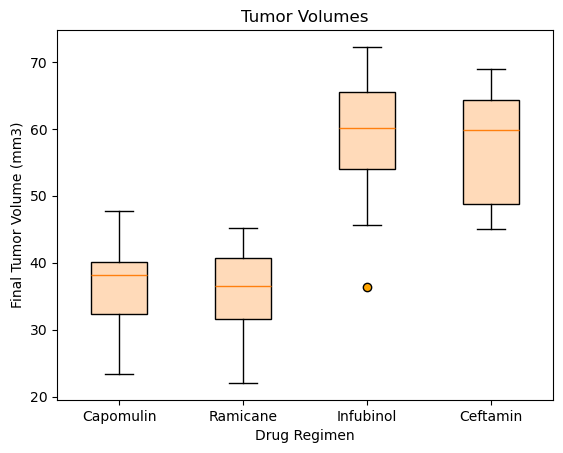

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plots = [Capomulin, Ramicane, Infubinol, Ceftamin]
#drugs = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Tumor Volumes')
ax1.boxplot(box_plots, labels=drugs, patch_artist = True,
           boxprops = dict(facecolor = "peachpuff"),
           flierprops = dict( marker = "o", markerfacecolor = "orange"))
plt.show()

## Line and Scatter Plots

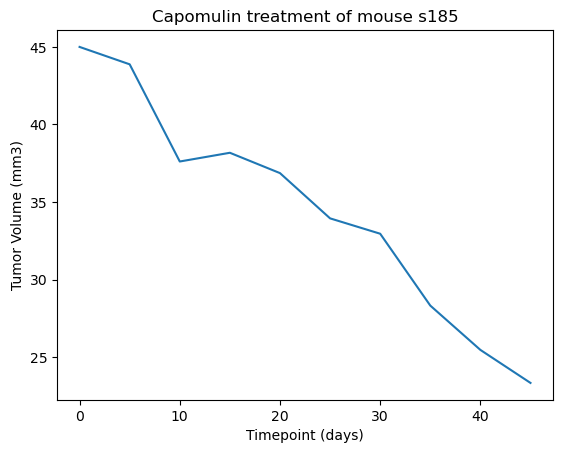

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
s185 = cleaned_df[cleaned_df['Mouse ID'] == 's185']
s185_sorted = s185.sort_values('Timepoint', ascending=True)

volume = s185_sorted["Tumor Volume (mm3)"]
timepoint = s185_sorted["Timepoint"]

plt.plot(timepoint, volume)
plt.title('Capomulin treatment of mouse s185')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

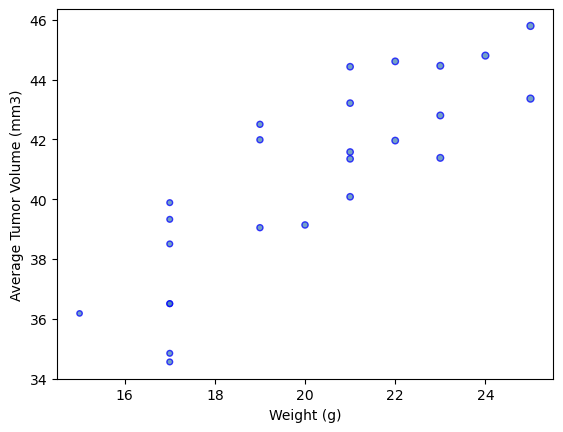

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
avg = cap.groupby(['Mouse ID']).mean()

x_limit = len(avg)
weight = avg['Weight (g)']

plt.scatter(weight, avg["Tumor Volume (mm3)"], marker="o", facecolors="steelblue", edgecolors="blue",
            s=weight, alpha=0.75)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = avg['Weight (g)']
vol = avg.iloc[:,3]
correlation = st.pearsonr(weight,vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


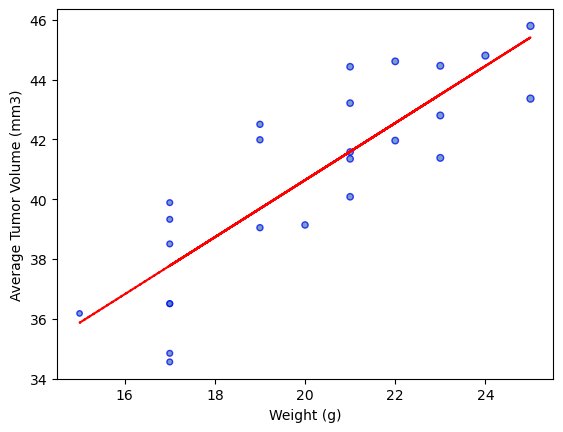

In [29]:
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(weight, vol)
p_fit = p_slope * weight + p_int
plt.scatter(weight, vol, marker="o", facecolors="steelblue", edgecolors="blue",
            s=weight, alpha=0.75)
plt.plot(weight,p_fit,"--", color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()